In [5]:
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
init_notebook_mode(connected=True)

In [2]:
N = 100
x = np.linspace(0,6*np.pi,100)
y = np.sin(x)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x,y=y))

fig.show()


In [45]:
def make_poly(x,y,deg):
    _data_dict = {}
    for _deg in range(deg+1):
        _data_dict ['X'+ str(_deg)] = x**_deg
    _df = pd.DataFrame(_data_dict)
    _df['y'] = y
    return _df

def return_weights(X,y):
    return np.linalg.solve(np.matmul(X.T,X),np.matmul(X.T,y))


def fit_and_display(x,y,sample,deg):
    df_data = make_poly(x,y,deg) 
    y_cols = 'y'
    x_cols = list(df_data.columns)
    x_cols.remove(y_cols)
    df_train = df_data.sample(n= sample,random_state=0)
 
    X_train = df_train.loc[:,x_cols].values
    y_train = df_train.loc[:,y_cols].values
    
    w_train = return_weights(X_train,y_train)
    y_hat = np.matmul(df_data.loc[:,x_cols].values,w_train)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_data.X1,y=df_data.y,mode ='lines'))
    fig.add_trace(go.Scatter(x=df_data.X1,y=y_hat,mode ='lines'))
    fig.add_trace(go.Scatter(x=df_train.X1,y=df_train.y,mode ='markers'))
    fig.update_layout(
    title=go.layout.Title(
            text= 'Deg = {}'.format(deg)
        ),showlegend=False,width=800, height=400
    )

    fig.show()
    
def get_mse(Y,Y_hat):
    return np.mean((Y - Y_hat)**2)


def plot_train_vs_test_curves(x,y,sample=20,max_deg=20):
    mse_train = []
    mse_test = []
    for _deg in range(max_deg + 1):
        df_data = make_poly(x,y,_deg)
        y_cols = 'y'
        x_cols = list(df_data.columns)
        df_train, df_test = train_test_split(df_data, train_size=sample)
        
        X_train = df_train.loc[:,x_cols].values
        y_train = df_train.loc[:,y_cols].values
        w_fit = return_weights(X_train,y_train)
        
        y_hat_train = np.matmul(df_train.loc[:,x_cols].values,w_fit)
        y_hat_test = np.matmul(df_test.loc[:,x_cols].values,w_fit)
        mse_train.append(get_mse(df_train.y,y_hat_train))
        mse_test.append(get_mse(df_test.y,y_hat_test))
        
    fig = go.Figure()
    fig.add_trace(go.Scatter(x= np.arange(len(mse_train)),y= mse_train,mode ='lines',name = 'train'))
    fig.add_trace(go.Scatter(x= np.arange(len(mse_train)), y= mse_test,mode ='lines',name = 'test'))
    fig.show()
    
    print(mse_train)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x= np.arange(len(mse_train)),y= mse_train,mode ='lines',name = 'train'))
    fig.show()

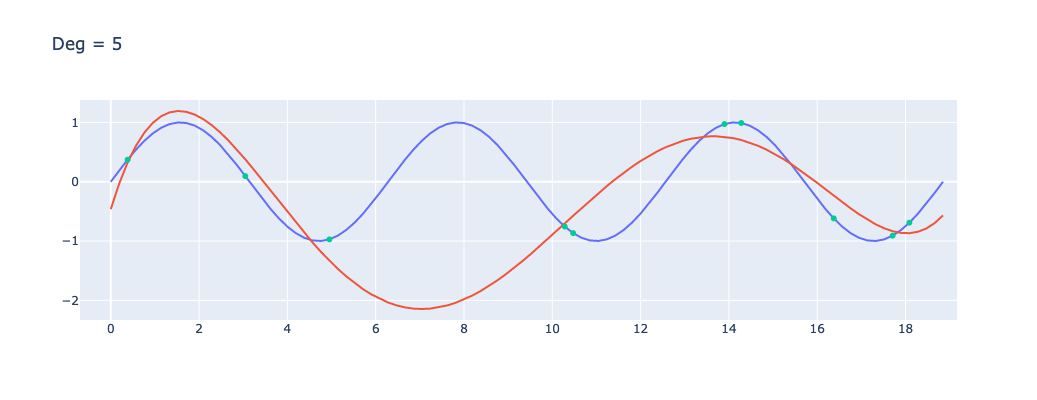

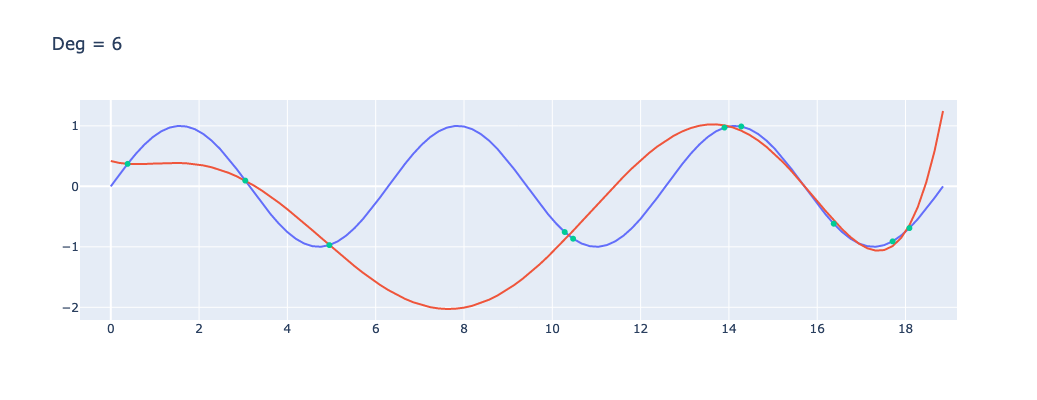

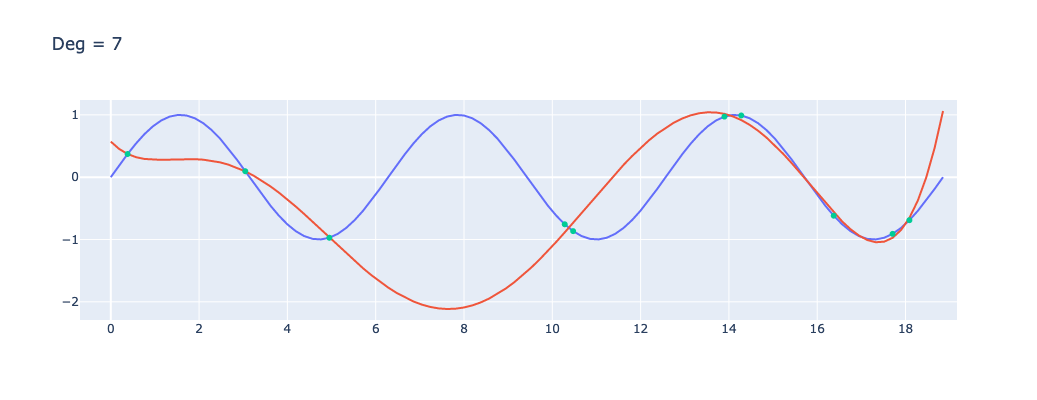

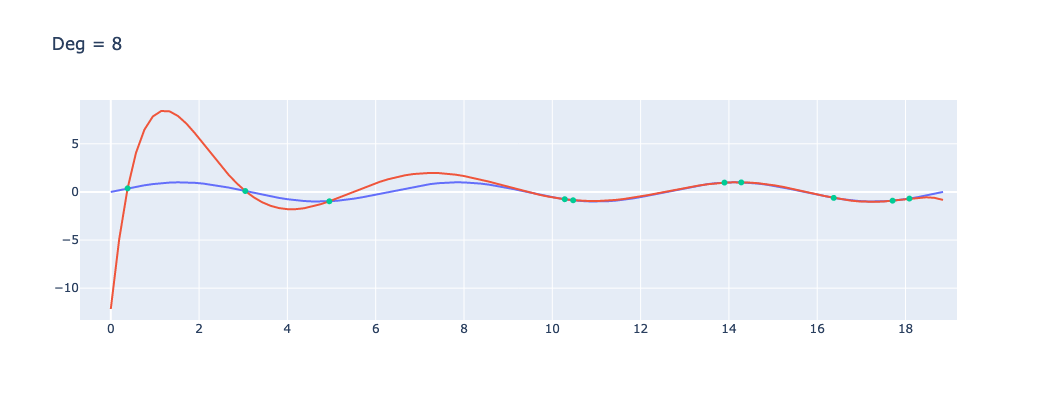

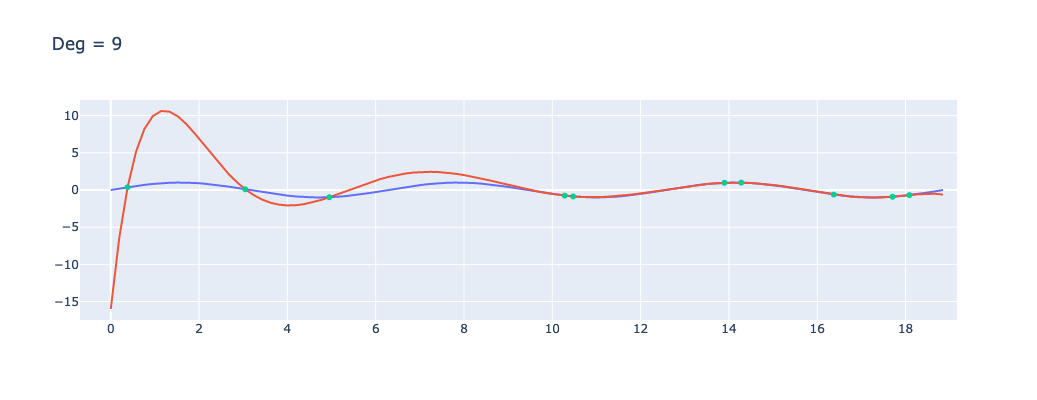

In [9]:
for deg in (5, 6, 7, 8, 9):
    fit_and_display(x, y, 10, deg)

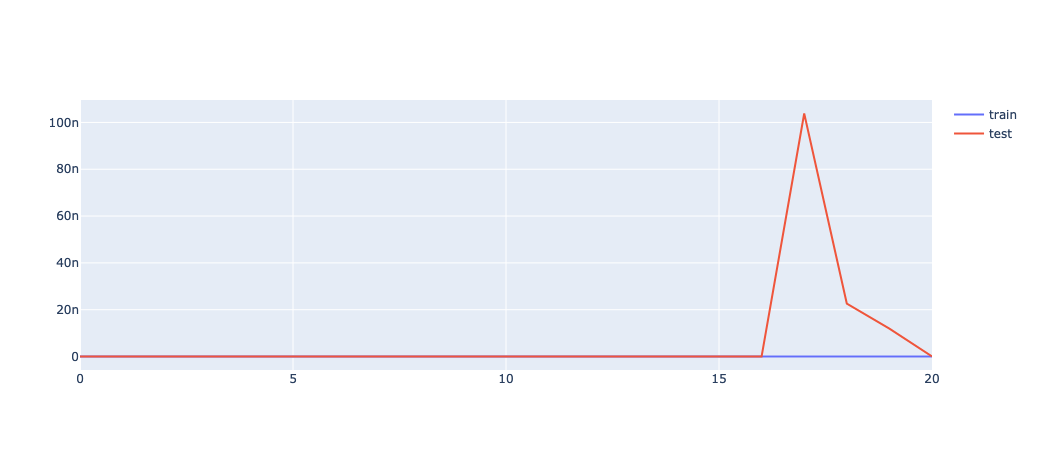

[6.201494420926899e-35, 1.891994217304518e-32, 7.581423226080353e-32, 1.741522152212158e-31, 1.3373690050053865e-28, 1.058585179113008e-28, 1.4646581320492895e-28, 2.938977142180601e-24, 1.3361049513693884e-22, 1.0737141476739884e-21, 1.5454907769249434e-19, 1.1370133599878918e-16, 1.0347781234818651e-17, 8.935073648363475e-18, 1.715986820432432e-20, 6.5690613907379154e-18, 3.067167763576219e-17, 6.489719800082706e-19, 6.177955895560582e-18, 2.4281999229465967e-17, 2.0022314756090464e-18]


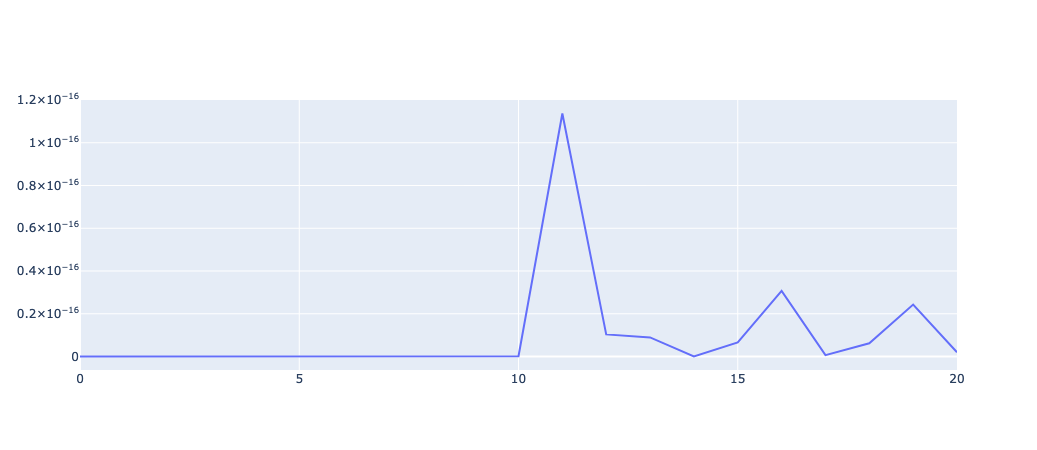

In [46]:
plot_train_vs_test_curves(x,y)

In [69]:
n = 10
d = 3

X = np.random.rand(n,d)
w = np.random.rand(d,1)
y = np.random.rand(n,2)

print(np.matmul(X,w).T.dot(y))

print(y.T.dot(np.matmul(X,w)))

[[6.84549676 4.37211305]]
[[6.84549676]
 [4.37211305]]
